In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Introduction

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
print("The shape of the data is:",df_data.shape)

The shape of the data is: (4324, 9)


In [9]:
count_row = df_data.shape[0]  
count_col = df_data.shape[1]  
print("There are",count_row, "rows and",count_col, "columns in this data.")

There are 4324 rows and 9 columns in this data.


In [10]:
print("The column names are as follows:",df_data.columns)

The column names are as follows: Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [14]:
df_data.isna()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [15]:
clean_df = df_data.dropna()

In [16]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df_data.head()

KeyError: "['Unnamed: 0' 'Unnamed: 0.1'] not found in axis"

## Descriptive Statistics

In [17]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [18]:
df_data[df_data["Price"].notna()]["Price"].str.replace(',', '').astype(float).describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<AxesSubplot:>

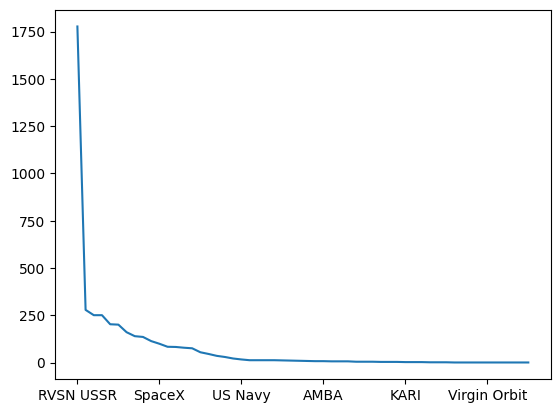

In [18]:
df_data["Organisation"].value_counts().plot()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [19]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

<AxesSubplot:>

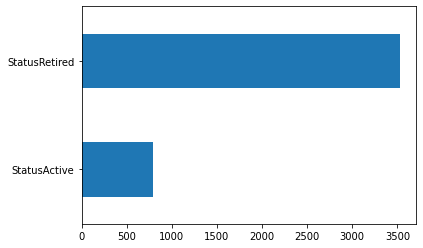

In [21]:
df_data["Rocket_Status"].value_counts().sort_values().plot(kind="barh")

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [20]:
df_data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [21]:
df_data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [22]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10) 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [23]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()


c:\Users\Lenovo\Desktop\backend coding\udemy python practice\python book practice\udemy python\chapter80\Dr_Sem_Ana_Mahendra\.venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [24]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


# Chart the Number of Launches per Year

In [25]:
# Converted the date to the datetime object, then extracted the year from the datetime object.
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)
# df_data['year'].head()

# Counted the number of times the same year is mentioned.
ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year', 
    'count'
]
# Passing the year and the count to the bar graph.
fig = px.bar(
    ds, 
    x='year', 
    y="count", 
    orientation='v', 
    title='Missions number by year' 
#     width=800
)
fig.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [26]:
# Using max to find the most launches per month
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

# print the month associated with the max value
ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 119


year     2020
count     119
dtype: int64

In [34]:
#Using min to find the least launches per month
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 268


month      1
count    268
dtype: int64

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [50]:
# Grab data from Organisations and Locations columns
# Sort through data to find the top 10 Organisations 
top_10=pd.DataFrame(columns=df_data.columns)
for val in df_data.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index:
  print(val)
  org=df_data[df_data.Organisation==val]
  top_10=top_10.append(org,ignore_index=False, verify_integrity=False, sort=None)
top_10

df_data[df_data.Organisation=="CASC"]

top_10.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index

# print(top_10.shape)

# Create a chart to display the data
px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation",nbins=10) 

RVSN USSR
Arianespace
General Dynamics
CASC
NASA
VKS RF
US Air Force
ULA
Boeing
Martin Marietta
